<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj14-students-performance-prediction?scriptVersionId=192733105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Students Performance Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

#**Import Libraries and Data**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rabieelkharoua/students-performance-dataset
!unzip students-performance-dataset.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 66.2k/66.2k [00:00<00:00, 576kB/s]
100%|███████████████████████████████████████| 66.2k/66.2k [00:00<00:00, 573kB/s]
Archive:  students-performance-dataset.zip
  inflating: Student_performance_data _.csv  


In [4]:
data = pd.read_csv("Student_performance_data _.csv").copy()

# **Take a look at the data**
---

In [5]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
data['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [9]:
data.shape

(2392, 15)

# **Exploratory Data Analysis**
---

**Univariate Analysis**

In [10]:
data.drop('StudentID',axis=1,inplace=True)

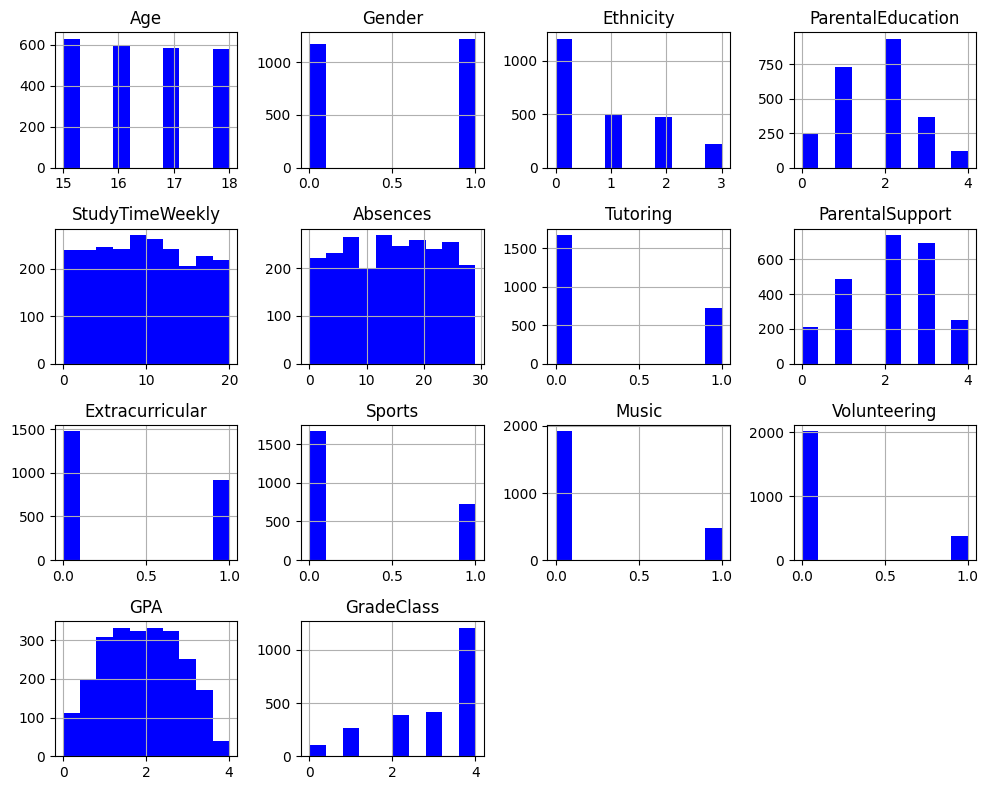

In [11]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

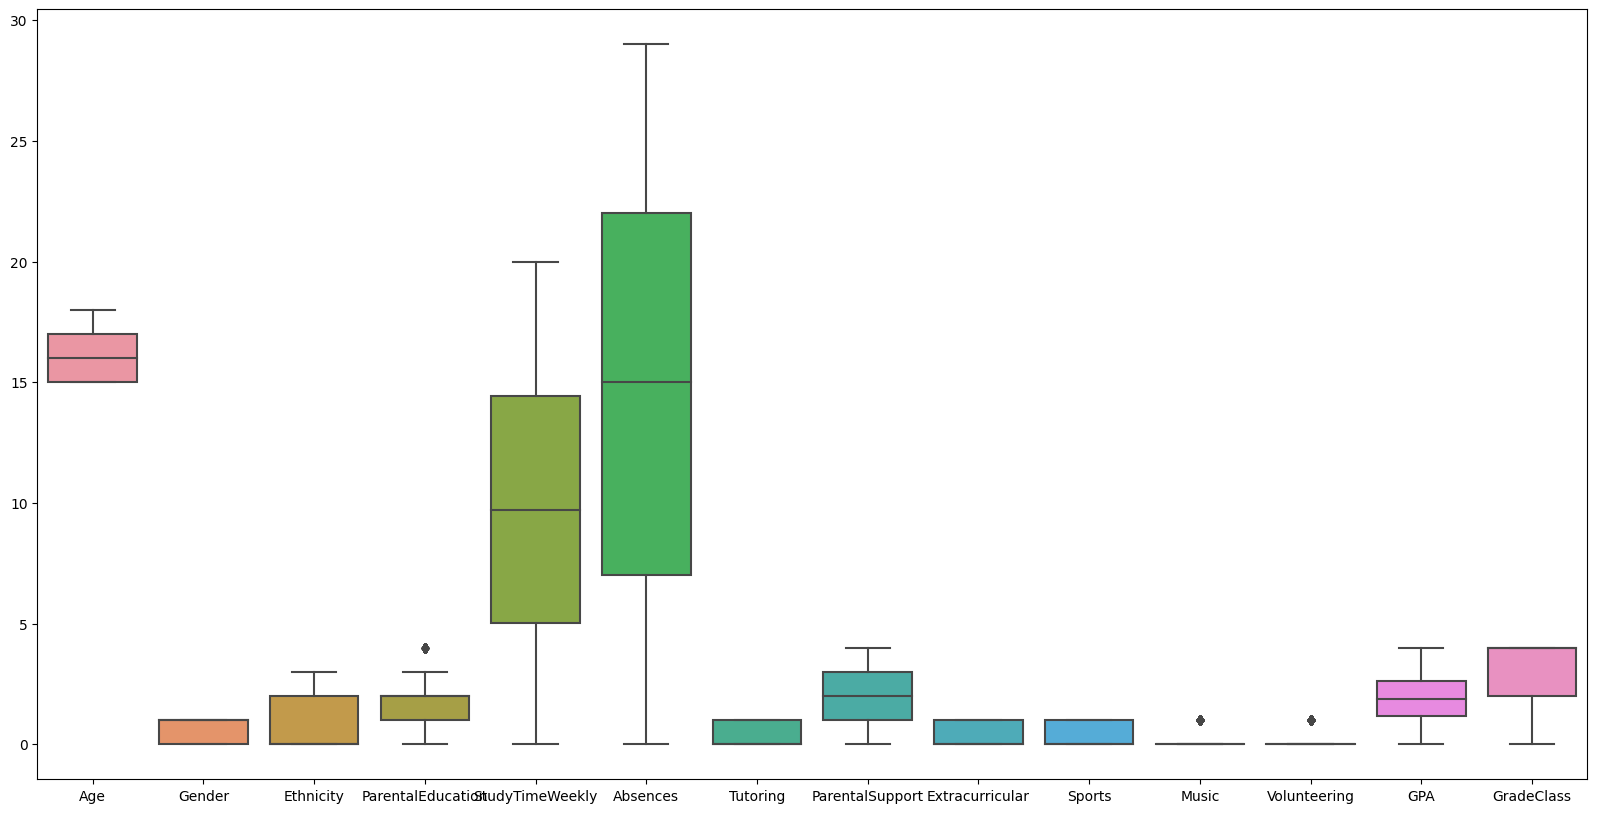

In [12]:
plt.figure(figsize=(20, 10))
sns.boxplot(numerical_data)
plt.show()

**Multivariate Analysis**

In [ ]:
sns.pairplot(data.select_dtypes(include='number'),corner = True)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [ ]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

**Handling Missing Data**

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

In [ ]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

# **Data Preprocessing**
---

**Data splitting**

In [ ]:
X = data.drop(['GradeClass'], axis = 1)
y = data['GradeClass']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state = 11,stratify=y)
xtest, xval, ytest, yval = train_test_split(X, y, test_size = 0.50, random_state = 11,stratify=y)

**Data Normalization**

In [ ]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
xval = scaler.transform(xval)

In [ ]:
from keras.utils import to_categorical

ytrain = to_categorical(ytrain, num_classes=5)

yval = to_categorical(yval, num_classes=5)

ytest = to_categorical(ytest, num_classes=5)

# **Modeling**
------

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as XGB

In [ ]:
from sklearn.metrics import classification_report , f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('xgboost', xgb.XGBClassifier())
]

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{clf_name}:')
    print(f"Cross Val Score: {cv_scores.mean():.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('---------------------------------------------------')

# **DNN**
----

**search**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

In [ ]:
# # Define the model-building function for the tuner
# def build_model(hp):
#     model = Sequential()
#     model.add(Input(shape=xtrain.shape[1:]))

#     # Hidden layers with tunable number of layers, units, and dropout rates
#     for i in range(hp.Int('num_layers', 1, 3)):
#         model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
#         model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

#     # Output layer
#     model.add(Dense(5, activation='softmax'))

#     # Compile the model
#     model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

#     return model

# # Define a custom objective function to consider both validation accuracy and overfitting
# def custom_objective(hp):
#     model = build_model(hp)
#     history = model.fit(xtrain, ytrain, epochs=100, validation_data=(xval, yval), batch_size=32, verbose=0)

#     train_accuracy = history.history['accuracy'][-1]
#     val_accuracy = history.history['val_accuracy'][-1]

#     # Penalize large gaps between training and validation accuracy
#     return val_accuracy - tf.abs(train_accuracy - val_accuracy)

# # Setup the tuner with the custom objective
# tuner = kt.RandomSearch(
#     build_model,  # the model-building function
#     objective=kt.Objective('val_accuracy', direction='max'),  # maximize validation accuracy
#     max_trials=20,  # total number of trials
#     executions_per_trial=2,  # number of models to average for each trial
#     directory='my_dir',  # where to save the search results
#     project_name='hyperparam_tuning_custom'  # a name for this search
# )

# # Run the search with the custom objective function
# tuner.search(xtrain, ytrain,
#              epochs=100,
#              validation_data=(xval, yval),
#              callbacks=[
#                  EarlyStopping(monitor='val_accuracy', patience=15, mode='max'),
#                  ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, mode='max')
#              ])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Print the best hyperparameters
# print(f"Best number of layers: {best_hps.get('num_layers')}")
# for i in range(best_hps.get('num_layers')):
#     print(f"Layer {i}: {best_hps.get(f'units_{i}')} units, dropout: {best_hps.get(f'dropout_{i}')}")

# # Train the best model
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(xtrain, ytrain,
#                     epochs=100,
#                     validation_data=(xval, yval),
#                     callbacks=[
#                         EarlyStopping(monitor='val_accuracy', patience=15, mode='max'),
#                         ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, mode='max')
#                     ])

# # Evaluate the model on the validation set
# val_loss, val_accuracy = model.evaluate(xval, yval)
# print(f'Validation Accuracy: {val_accuracy}')

# # Predict using the trained model
# predictions = model.predict(xval)
# print(f'Sample Predictions: {predictions[:5]}')


In [ ]:
model = Sequential(
    [Input(shape=xtrain.shape[1:]),
     Dense(192,'relu'),
         Dropout(0.2),
     Dense(128,'relu'),
          Dropout(0.2),
     Dense(32,'relu'),
          Dropout(0.1),
     Dense(5,'softmax')])

In [ ]:
model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=['F1Score'])

In [ ]:
E = EarlyStopping(monitor='val_f1_score', patience=15, mode='max')
R = ReduceLROnPlateau(monitor='val_f1_score', factor=0.5, patience=10)

In [ ]:
history = model.fit(xtrain,ytrain,epochs=1000,validation_data=[xval,yval],callbacks=[R,E])

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['F1Score'])
plt.plot(history.history['val_F1Score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(xtest,ytest)